In [46]:
import numpy as np  # http://www.numpy.org
import matplotlib.pyplot as plt   # http://matplotlib.org
import math as M  # https://docs.python.org/2/library/math.html
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
from scipy.integrate import odeint

# Simple model including salinity

In [47]:
#### Constants #####
L_x = 1000000 #zonal extent [m]
L_y = 2000000 #meridional extent [m]
A = L_x*L_y #surface area of interior [m^2] Note that the interior is probably smaller than this
P = 2*L_x+2*L_y #Perimeter [m]

g = 9.81 #gravitational acceleration [m/s^2]
C_p = 3994 #specific heat capacity of sea water [J/(kg K)] source: Steffie's paper
alpha_T = 0.2 #thermal expansion coefficient [kg m^-3 C^-1] source: Steffie's paper
alpha_S = 0.8 #Haline expansion coefficient [kg m^-3]
c = 0.006 #bottom slope coefficient
s = 0.02 #average bottom slope around the perimeter of the marginal sea
S = 35 #reference salinity [ppt]. Spall [2015]
E = -2e-8 #constant freshwater flux [m/s]
S_1 = 35.2 #from Lambert [g kg^-1]

#### Parameters ####
H = 1000 #sill height [m]
f_0 = 1.2e-4 #Coriolis parameter [s^-1]
Gamma = 20 #Restoring strength [W/(m^2 C)]

L = H/s #width of sloping topography of the boundary current [m]
T_1 = 8.87 #ingoing temperature [Celsius]
T_A = 2.8 #Atmospheric temperature [Celsius]
ro_0 = 1028  #density sea water [kg m^-3]. Range of 7 to 9 degrees of sea water
#h_1 = ... #thickness upper layer [m]

#### functions ####
epsilon = c*P/L #ratio of heat fluxed into interior by eddies compared to heat flux by advection into the basin in the inflowing boundary current [-]
mu = A*Gamma*f_0/(alpha_T*g*C_p*H**2*(T_1-T_A)) #[-]
gamma = 8*A*ro_0*f_0*S*alpha_S*E/(g*H**2*alpha_T**2*(T_1-T_A)**2)


In [48]:
############# Computation ##################
############################################

# Main equations including salinity in the equation of state

def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
    return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro_0*C_p),
            P*H*x[6]+A*E*S,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro_0*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
            g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]

[T_0,T_2,S_0,S_2,V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

In [49]:
[T_0,T_2,S_0,S_2,V_1,T_eddy,S_eddy]

[6.224002138509651,
 6.458278362452684,
 35.08894843551929,
 35.10804930078094,
 0.3501876723572814,
 0.005559574995615423,
 0.00023333333333333333]

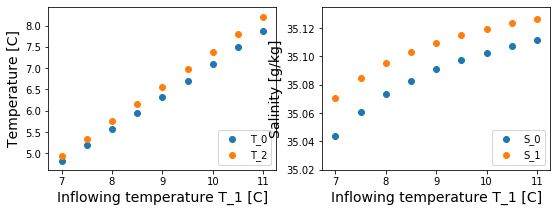

In [50]:
T_1_array = [7,7.5,8,8.5,9,9.5,10,10.5,11]
T_0 = np.zeros(len(T_1_array))
T_2 = np.zeros(len(T_1_array))
S_0 = np.zeros(len(T_1_array))
S_2 = np.zeros(len(T_1_array))

for i in range(len(T_1_array)):
    T_1=T_1_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro_0*C_p),
                P*H*x[6]+A*E*S,
                (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro_0*C_p),
                (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
                g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
                c*x[4]*(T_1-x[0])-x[5],
                c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.scatter(T_1_array, T_0, label='T_0')
plt.scatter(T_1_array, T_2, label='T_2')
plt.xlabel('Inflowing temperature T_1 [C]', fontsize=14) # label along x-axes
plt.ylabel('Temperature [C]', fontsize=14) # label along x-axes
plt.legend(loc='lower right')
plt.subplot(122)
plt.scatter(T_1_array, S_0, label='S_0')
plt.scatter(T_1_array, S_2, label='S_1')
plt.xlabel('Inflowing temperature T_1 [C]', fontsize=14) # label along x-axes
plt.ylabel('Salinity [g/kg]', fontsize=14) # label along x-axes
plt.legend(loc='lower right')
plt.show()

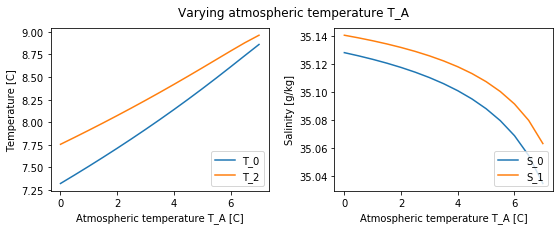

In [51]:
T_A_array = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]
T_0 = np.zeros(len(T_A_array))
T_2 = np.zeros(len(T_A_array))
S_0 = np.zeros(len(T_A_array))
S_2 = np.zeros(len(T_A_array))

for i in range(len(T_A_array)):
    T_A=T_A_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro_0*C_p),
                P*H*x[6]+A*E*S,
                (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro_0*C_p),
                (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
                g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
                c*x[4]*(T_1-x[0])-x[5],
                c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.plot(T_A_array, T_0, label='T_0')
plt.plot(T_A_array, T_2, label='T_2')
plt.xlabel('Atmospheric temperature T_A [C]') # label along x-axes
plt.ylabel('Temperature [C]') # label along x-axes
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(T_A_array, S_0, label='S_0')
plt.plot(T_A_array, S_2, label='S_1')
plt.xlabel('Atmospheric temperature T_A [C]') # label along x-axes
plt.ylabel('Salinity [g/kg]') # label along x-axes
plt.legend(loc='lower right')
plt.suptitle('Varying atmospheric temperature T_A')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.show()

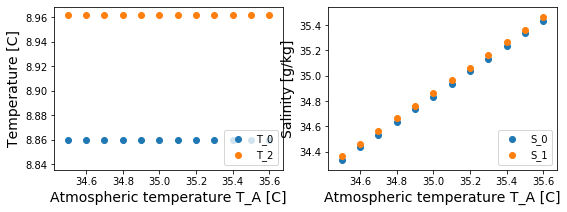

In [52]:
S_1_array = [34.5,34.6,34.7,34.8,34.9,35,35.1,35.2,35.3,35.4,35.5,35.6]
T_0 = np.zeros(len(S_1_array))
T_2 = np.zeros(len(S_1_array))
S_0 = np.zeros(len(S_1_array))
S_2 = np.zeros(len(S_1_array))

for i in range(len(S_1_array)):
    S_1=S_1_array[i]
    def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
        return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(ro_0*C_p),
                P*H*x[6]+A*E*S,
                (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(ro_0*C_p),
                (S_1-x[3])*x[4]*H*L+E*A*S+P*L*E*S,
                g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
                c*x[4]*(T_1-x[0])-x[5],
                c*x[4]*(S_1-x[2])-x[6]]
    [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.scatter(S_1_array, T_0, label='T_0')
plt.scatter(S_1_array, T_2, label='T_2')
plt.xlabel('Atmospheric temperature T_A [C]', fontsize=14) # label along x-axes
plt.ylabel('Temperature [C]', fontsize=14) # label along x-axes
plt.legend(loc='lower right')
plt.subplot(122)
plt.scatter(S_1_array, S_0, label='S_0')
plt.scatter(S_1_array, S_2, label='S_1')
plt.xlabel('Atmospheric temperature T_A [C]', fontsize=14) # label along x-axes
plt.ylabel('Salinity [g/kg]', fontsize=14) # label along x-axes
plt.legend(loc='lower right')
plt.show()

In [53]:
#### Two main equations #####

#Interior temperature [Celsius] -> without the effect of salinity
T_0 = T_1 - (mu/epsilon)*(M.sqrt(1+2*epsilon/mu)-1)*(T_1 - T_A)
Delta_T = (T_1-T_0)/(T_1-T_A)

#Interior salinity [g kg^-1]
S_0 = S_1 + 2*A*E*S*ro_0*f_0*L/(g*c*P*H**2*alpha_T*(T_1-T_0))
#Delta_S = 0.5*(Delta_T + M.sqrt(Delta_T**2 + gamma/epsilon)) #haline mode
#S_0 = S_1 - Delta_S*alpha_T*(T_1-T_A)/alpha_S


In [54]:
#### Follow up computations ####

#Velocity in boundary current [m/s]
V_1 = g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-T_0) - alpha_S*(S_1-S_0))

#Outflowing salinity [g kg^-1]
S_out = S_1 + E*A*S_0/(V_1*H*L)

#Outflowing temperature [Celsius]
T_out = A*Gamma/(ro_0*C_p*V_1*H*L)*(T_0-T_A+P*L/A*(T_1-T_A))

#Densities -> not sure they are correct though..
ro_1 = ro_0*(1-alpha_T*(T_1-T_0) + alpha_S*(S_1-S_0))
ro_out = ro_0*(1-alpha_T*(T_out-T_0) + alpha_S*(S_out-S_0))

#Downwelling/Medidional overturning strength at the sill [m^2/s]
W = g*H**2*(ro_1 - ro_out)/(4*ro_0*f_0)

In [55]:
T_0, S_0, V_1, S_out, T_out, W

(9.369893716771712,
 35.45000217174408,
 0.16383637901600548,
 35.426900460644184,
 3.5319892931136367,
 -27695316295.930405)

In [56]:
#Without salinity in the equation of state

def main(x): # function with four unkowns: T_0, T_2, S_0, S_2 = x[0],x[1],x[2],x[3]
    return [alpha_T*g/(2*ro_0*f_0)*(T_1-x[0])*H/L*c*(T_1-x[0])*P*H-A*Gamma*(x[0]-T_A)/(ro_0-T_A),                        
           
            alpha_T*g/(2*ro_0*f_0)*(T_1-x[0])*H/L*c*(S_1-x[2])*P*H+A*E*S,
           
            alpha_T*g/(2*ro_0*f_0)*((T_1-x[0])*H/L)*(T_1-x[1])*H*L+A*Gamma/(ro_0*C_p)*((1+P*L/A)*(T_1-T_A)-(T_1-x[0])),   
                
            alpha_T*g/(2*ro_0*f_0)*((T_1-x[0])*H/L)*(S_1-x[3])+E*A*S]          

In [57]:
root = fsolve(main, [1,1,1,1])
root

array([ 7.00233564e+00,  1.11845850e+01,  3.55388362e+01, -2.20186171e+06])

In [58]:
#Without salinity in the equation of state

def main(x):
    return[-x[0] + T_1 - (mu/epsilon)*(M.sqrt(1+2*epsilon/mu)-1)*(T_1 - T_A), 
           -x[1] + S_1 - 2*A*E*S*ro_0*f_0*L/(g*c*P*H**2*alpha_T*(T_1-x[0])),
           -x[2] + A*Gamma/(ro_0*C_p*g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0]) - alpha_S*(S_1-x[1]))*H*L)*(x[0]-T_A+P*L/A*(T_1-T_A)),
           -x[3] + S_1 + E*A*S_0/(g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0]) - alpha_S*(S_1-x[1]))*H*L)]

In [59]:
root = fsolve(main, [1,1,1,1])
root

array([ 9.36989372, 35.74999783,  1.63147795, 35.52004277])

In [60]:
#Including salinity in the equation of state

def main(x):
    return[ g*c*P*H**2*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[1]))*(T_1-x[0])/(2*ro_0*f_0*L)-A*Gamma*(x[0]-T_A)/(ro_0*C_p),
            g*c*P*H**2*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[1]))*(S_1-x[1])/(2*ro_0*f_0*L) + A*E*S,
            (T_1-x[2])*g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0]) - alpha_S*(S_1-x[1]))*H*L - A*Gamma*(x[0]-T_A + P*L/A*(T_1-T_A))/(ro_0*C_p),
            (S_1-x[3])*g*H/(2*ro_0*f_0*L)*(alpha_T*(T_1-x[0]) - alpha_S*(S_1-x[1]))*H*L + E*A*S + P*L*E*S]

In [61]:
root = fsolve(main, [1,1,1,1])
root

array([ 8.85987874, 35.43464285,  8.96201986, 35.46308428])

In [66]:
steps=10        # test values
dx=10            # test values

T_0 = np.zeros(steps)
S_0 = np.zeros(steps)
V = np.zeros(steps)
T_1 = np.zeros(steps)
S_1 = np.zeros(steps)

T_1[0] = 8.87 
S_1[0] = 35.2 

for i in range(steps-1):
    def main(x): # function with seven unkowns:  T_0,  S_0,    V, T_1+1, S_1+1,  V_+1 
                 #                              x[0], x[1], x[2],  x[3],  x[4],  x[5]
        return [c*x[2]*(T_1[i]-x[0])-A*Gamma*(x[0]-T_A)/(ro_0*C_p),
                c*x[2]*(S_1[i]-x[1])-A*E*S,
                x[3]-x[2]*(T_1[i]-x[0])*c*dx/(H*L*x[2])+T_1[i]*(x[5]-x[2])/x[2] - T_1[i],
                x[5]-x[2]*(T_1[i]-x[0])*c*dx/(H*L*T_1[i])+x[2]*(x[3]-T_1[i])/T_1[i] - x[2],
                x[4]-x[2]*(S_1[i]-x[1])*c*dx/(H*L*x[2])+S_1[i]*(x[5]-x[2])/x[2] - S_1[i],
                x[5]-x[2]*(S_1[i]-x[1])*c*dx/(H*L*T_1[i])+x[2]*(x[4]-S_1[i])/S_1[i] - x[2]]

    [T_0[i],S_0[i],V[i],T_1[i+1],S_1[i+1],V[i+1]] = fsolve(main, [1,1,1,1,1,1]) 
    # V[i] and V[i+1] are calculated at the same time - that's not so good I think
    
T_0,S_0,V,T_1,S_1,V

(array([7.        , 7.00299328, 6.99985956, 6.99998572, 6.99999324,
        6.99724469, 6.99998267, 7.09233838, 6.99770924, 0.        ]),
 array([ 1.99537729e+08,  1.96419833e+08,  2.32428096e+08, -5.51649557e+06,
         3.12192128e+08, -7.44489206e+07, -1.82717865e+09,  8.12275715e+08,
         7.51156301e+07,  0.00000000e+00]),
 array([  1.16941792,   1.28612645,   1.00000244, -42.28048995,
          0.74726354,  -2.89557888,  -0.11671385,   1.01966204,
          2.90984216,   5.7834376 ]),
 array([ 8.87000000e+00,  3.77895941e+06, -2.28033636e+05,  5.55521699e+02,
        -1.46833733e+04,  1.54505741e+06,  2.41159012e+05,  1.47039350e+08,
        -1.27824679e+06, -1.59226028e+04]),
 array([ 3.52000000e+01,  1.49965467e+07, -9.04936410e+05,  2.20427222e+03,
        -5.82626173e+04,  6.13068139e+06,  9.56902440e+05,  5.83442071e+08,
        -5.07199533e+06, -6.31798828e+04]),
 array([  1.16941792,   1.28612645,   1.00000244, -42.28048995,
          0.74726354,  -2.89557888,  -0.1167